In [1]:
import torch  
from torch import nn, optim  
import torch.nn.functional as func
from torchvision import datasets, transforms # 导入数据集与数据预处理的方法import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


transform = transforms.Compose([transforms.RandomCrop(size=(32, 32),padding = 4),
                                transforms.RandomHorizontalFlip(),#水平翻转
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])])

batch_size = 64
# 下载cifar10训练集和测试集数据，并构建训练集数据载入器trainloader,每次从训练集中载入64张图片，每次载入都打乱顺序
trainset = datasets.CIFAR10('./data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, drop_last=True)

testset = datasets.CIFAR10('./data', download=True,train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, drop_last=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.main = nn.Sequential(
            #第一层
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),#卷积层
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),#最大池化
            nn.BatchNorm2d(num_features=32),#正则化
            
            #第二层
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(num_features=64),
            
            #第三层
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(num_features=128),           
        )
        
        #分类
        self.fc = nn.Sequential(
            #展平
            nn.Flatten(),
            
            #线形层
            nn.Linear(128*4*4,1024),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.Linear(1024,256),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.Linear(256,10)
        )
        
    #前向传播    
    def forward(self,x):
        return self.fc(self.main(x))
        

a:

In [3]:
model = Net()
#构造损失函数
loss_func = nn.CrossEntropyLoss()
#定义优化器
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
acc_list, epoch_list = [], []
epochs = 30
for lr in learning_rates:
    print("开始学习：")
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_step = 0
    for i in range(epochs):
        model.train()
        for imgs,labels in trainloader:
            outputs = model(imgs)
            #计算损失
            loss = loss_func(outputs,labels)
            #梯度清零
            optimizer.zero_grad()
            #反向传播
            loss.backward()
            #更新梯度
            optimizer.step()

        #进行评估
        model.eval()
        accuracy = 0
        with torch.no_grad():
            for imgs,labels in testloader:
                outputs = model(imgs)
                #计算准确率
                accuracy += (outputs.argmax(axis = 1) == labels).sum()

            print("学习次数: {}\t".format(i+1),
                  "模型分类准确率: {:.2f}".format(accuracy/len(testset)))
            if accuracy/len(testset) > 0.8:
                break
    
    print("当学习率为{}时，进行{}次训练准确率为{:.2f}".format(lr, i+1, accuracy/len(testset)))
    acc_list.append("{:.2f}".format(accuracy/len(testset)))
    epoch_list.append(i+1 )
    

开始学习：
学习次数: 1	 模型分类准确率: 0.22
学习次数: 2	 模型分类准确率: 0.27
学习次数: 3	 模型分类准确率: 0.28
学习次数: 4	 模型分类准确率: 0.29
学习次数: 5	 模型分类准确率: 0.31
学习次数: 6	 模型分类准确率: 0.32
学习次数: 7	 模型分类准确率: 0.33
学习次数: 8	 模型分类准确率: 0.34
学习次数: 9	 模型分类准确率: 0.35
学习次数: 10	 模型分类准确率: 0.36
学习次数: 11	 模型分类准确率: 0.36
学习次数: 12	 模型分类准确率: 0.37
学习次数: 13	 模型分类准确率: 0.38
学习次数: 14	 模型分类准确率: 0.38
学习次数: 15	 模型分类准确率: 0.39
学习次数: 16	 模型分类准确率: 0.39
学习次数: 17	 模型分类准确率: 0.40
学习次数: 18	 模型分类准确率: 0.41
学习次数: 19	 模型分类准确率: 0.41
学习次数: 20	 模型分类准确率: 0.42
学习次数: 21	 模型分类准确率: 0.42
学习次数: 22	 模型分类准确率: 0.42
学习次数: 23	 模型分类准确率: 0.43
学习次数: 24	 模型分类准确率: 0.44
学习次数: 25	 模型分类准确率: 0.44
学习次数: 26	 模型分类准确率: 0.44
学习次数: 27	 模型分类准确率: 0.45
学习次数: 28	 模型分类准确率: 0.45
学习次数: 29	 模型分类准确率: 0.45
学习次数: 30	 模型分类准确率: 0.45
当学习率为1e-06时，进行30次训练准确率为0.45
开始学习：
学习次数: 1	 模型分类准确率: 0.48
学习次数: 2	 模型分类准确率: 0.51
学习次数: 3	 模型分类准确率: 0.53
学习次数: 4	 模型分类准确率: 0.54
学习次数: 5	 模型分类准确率: 0.56
学习次数: 6	 模型分类准确率: 0.57
学习次数: 7	 模型分类准确率: 0.58
学习次数: 8	 模型分类准确率: 0.59
学习次数: 9	 模型分类准确率: 0.60
学习次数: 10	 模型分类准确率: 0.60
学习次数: 11	 模型分类准确率:

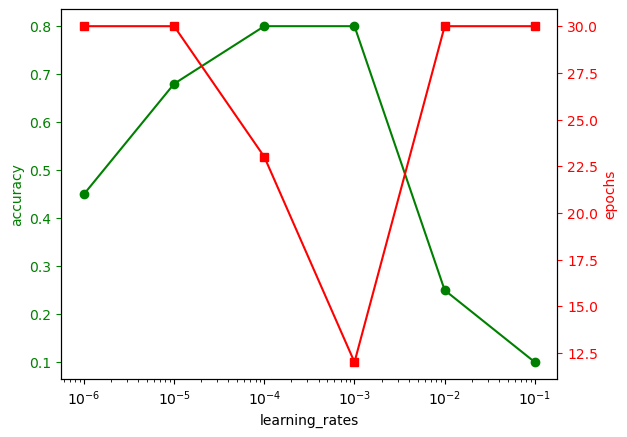

In [14]:
accuracy = [float(x) for x in acc_list]
fig, ax1 = plt.subplots()
plt.xscale('log')
# 绘制左Y轴
ax1.plot(learning_rates, accuracy, 'g', marker='o')
ax1.set_xlabel('learning_rates')
ax1.set_ylabel('accuracy', color='g')
ax1.tick_params('y', colors='g')

# 绘制右Y轴
ax2 = ax1.twinx()
ax2.plot(learning_rates, epoch_list, 'r', marker='s')
ax2.set_ylabel('epochs', color='r')
ax2.tick_params('y', colors='r')

plt.show()

较小的学习率可能需要更多的训练迭代次数来达到收敛，但可能能够得到更好的模型性能。较大的学习率可能会导致模型无法收敛或者出现震荡，但在合适的学习率下能够加快训练速度。

b:

In [15]:
batch_size = 64
# 进行数据增强操作
transform = transforms.Compose([transforms.RandomCrop(size=(32, 32),padding = 4),#自由裁剪
                                transforms.RandomHorizontalFlip(),#水平翻转
                                transforms.RandomAffine(degrees=30, scale=(0.9,1), translate=(0,0.2)),#仿射
                                transforms.RandomGrayscale(),#随机变为灰度图
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])])

trainset_more = datasets.CIFAR10('./data', download=True, train=True, transform=transform)
trainloader_more = torch.utils.data.DataLoader(trainset_more, batch_size=batch_size, shuffle=True, drop_last=True)

testset_more = datasets.CIFAR10('./data', download=True,train=False, transform=transform)
testloader_more = torch.utils.data.DataLoader(testset_more, batch_size=batch_size, shuffle=True, drop_last=True)

transform = transforms.Compose([transforms.ToTensor()])
#不进行数据增强
trainset_not = datasets.CIFAR10('./data', download=True, train=True, transform=transform)
trainloader_not = torch.utils.data.DataLoader(trainset_not, batch_size=batch_size, shuffle=True, drop_last=True)

testset_not = datasets.CIFAR10('./data', download=True,train=False, transform=transform)
testloader_not = torch.utils.data.DataLoader(testset_not, batch_size=batch_size, shuffle=True, drop_last=True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [16]:
def train_model(model, trainloader, testloader, optimizer, loss_func, epochs):
    for i in range(epochs):
        model.train()
        for imgs, labels in trainloader:
            outputs = model(imgs)
            # 计算损失
            loss = loss_func(outputs, labels)
            # 梯度清零
            optimizer.zero_grad()
            # 反向传播
            loss.backward()
            # 更新梯度
            optimizer.step()

        # 进行评估
        model.eval()
        accuracy = 0
        with torch.no_grad():
            for imgs, labels in testloader:
                outputs = model(imgs)
                # 计算准确率
                accuracy += (outputs.argmax(axis=1) == labels).sum()

        print("学习次数: {}\t".format(i+1),
              "模型分类准确率: {:.2f}".format(accuracy / len(testset)))

In [17]:
model_more = Net()
model_not = Net()
model_mid = Net()
epochs = 20
#构造损失函数
loss_func = nn.CrossEntropyLoss()
#定义优化器
lr = 1e-3
optimizer_more = optim.Adam(model_more.parameters(), lr=lr)
optimizer_not = optim.Adam(model_not.parameters(), lr=lr)
optimizer_mid = optim.Adam(model_mid.parameters(), lr=lr)
print("进行过度数据增强")
train_model(model_more, trainloader_more, testloader_more, optimizer_more, loss_func, epochs)
print("不进行数据增强")
train_model(model_not, trainloader_not, testloader_not, optimizer_not, loss_func, epochs)
print("进行适度数据增强")
train_model(model_mid, trainloader, testloader, optimizer_mid, loss_func, epochs)

进行过度数据增强
学习次数: 1	 模型分类准确率: 0.47
学习次数: 2	 模型分类准确率: 0.53
学习次数: 3	 模型分类准确率: 0.57
学习次数: 4	 模型分类准确率: 0.60
学习次数: 5	 模型分类准确率: 0.61
学习次数: 6	 模型分类准确率: 0.62
学习次数: 7	 模型分类准确率: 0.65
学习次数: 8	 模型分类准确率: 0.65
学习次数: 9	 模型分类准确率: 0.66
学习次数: 10	 模型分类准确率: 0.66
学习次数: 11	 模型分类准确率: 0.67
学习次数: 12	 模型分类准确率: 0.67
学习次数: 13	 模型分类准确率: 0.67
学习次数: 14	 模型分类准确率: 0.66
学习次数: 15	 模型分类准确率: 0.68
学习次数: 16	 模型分类准确率: 0.70
学习次数: 17	 模型分类准确率: 0.69
学习次数: 18	 模型分类准确率: 0.70
学习次数: 19	 模型分类准确率: 0.70
学习次数: 20	 模型分类准确率: 0.71
不进行数据增强
学习次数: 1	 模型分类准确率: 0.67
学习次数: 2	 模型分类准确率: 0.70
学习次数: 3	 模型分类准确率: 0.74
学习次数: 4	 模型分类准确率: 0.75
学习次数: 5	 模型分类准确率: 0.77
学习次数: 6	 模型分类准确率: 0.77
学习次数: 7	 模型分类准确率: 0.78
学习次数: 8	 模型分类准确率: 0.78
学习次数: 9	 模型分类准确率: 0.78
学习次数: 10	 模型分类准确率: 0.78
学习次数: 11	 模型分类准确率: 0.78
学习次数: 12	 模型分类准确率: 0.78
学习次数: 13	 模型分类准确率: 0.79
学习次数: 14	 模型分类准确率: 0.78
学习次数: 15	 模型分类准确率: 0.79
学习次数: 16	 模型分类准确率: 0.76
学习次数: 17	 模型分类准确率: 0.79
学习次数: 18	 模型分类准确率: 0.77
学习次数: 19	 模型分类准确率: 0.78
学习次数: 20	 模型分类准确率: 0.78
进行适度数据增强
学习次数: 1	 模型分类准确率: 0.60
学习次数: 2	 

根据运行结果可知进行数据进行增强后，虽然在前几次训练模型准确度不如不进行处理的，但进行多轮训练后，不进行处理的模型准确度不再提升，但进行处理的数据的准确度还能继续提升并且最终的准确度也高于未处理的。因为数据增强对数据图像进行了变化，能够降低过拟合的风险，特别是在小数据集上能让数据结果更好，但对数据进行过度的处理，反而有可能导致数据无法拟合，也得不到好的结果

c:

In [18]:
epochs = 20
#指数衰减
model_sch = Net()
for i in range(epochs):
    optimizer = optim.Adam(model_sch.parameters(), lr=0.005*(0.8**(i)))
    model_sch.train()
    for imgs, labels in trainloader:
        outputs = model_sch(imgs)
        # 计算损失
        loss = loss_func(outputs, labels)
        # 梯度清零
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 更新梯度
        optimizer.step()

    # 进行评估
    model_sch.eval()
    accuracy = 0
    with torch.no_grad():
        for imgs, labels in testloader:
            outputs = model_sch(imgs)
            # 计算准确率
            accuracy += (outputs.argmax(axis=1) == labels).sum()

    print("学习次数: {}\t".format(i+1),
          "模型分类准确率: {:.2f}".format(accuracy / len(testset)))

学习次数: 1	 模型分类准确率: 0.36
学习次数: 2	 模型分类准确率: 0.56
学习次数: 3	 模型分类准确率: 0.64
学习次数: 4	 模型分类准确率: 0.64
学习次数: 5	 模型分类准确率: 0.68
学习次数: 6	 模型分类准确率: 0.70
学习次数: 7	 模型分类准确率: 0.73
学习次数: 8	 模型分类准确率: 0.74
学习次数: 9	 模型分类准确率: 0.75
学习次数: 10	 模型分类准确率: 0.75
学习次数: 11	 模型分类准确率: 0.76
学习次数: 12	 模型分类准确率: 0.76
学习次数: 13	 模型分类准确率: 0.77
学习次数: 14	 模型分类准确率: 0.77
学习次数: 15	 模型分类准确率: 0.78
学习次数: 16	 模型分类准确率: 0.78
学习次数: 17	 模型分类准确率: 0.78
学习次数: 18	 模型分类准确率: 0.78
学习次数: 19	 模型分类准确率: 0.78
学习次数: 20	 模型分类准确率: 0.78


In [20]:
#固定步长衰减
model_stp = Net()
lr=0.005
for i in range(epochs):
    optimizer = optim.Adam(model_stp.parameters(), lr=lr)
    if i%3 == 0:
        lr /= 2
    model_stp.train()
    for imgs, labels in trainloader:
        outputs = model_stp(imgs)
        # 计算损失
        loss = loss_func(outputs, labels)
        # 梯度清零
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 更新梯度
        optimizer.step()

    # 进行评估
    model_stp.eval()
    accuracy = 0
    with torch.no_grad():
        for imgs, labels in testloader:
            outputs = model_stp(imgs)
            # 计算准确率
            accuracy += (outputs.argmax(axis=1) == labels).sum()

    print("学习次数: {}\t".format(i+1),
          "模型分类准确率: {:.2f}".format(accuracy / len(testset)))

学习次数: 1	 模型分类准确率: 0.37
学习次数: 2	 模型分类准确率: 0.55
学习次数: 3	 模型分类准确率: 0.64
学习次数: 4	 模型分类准确率: 0.67
学习次数: 5	 模型分类准确率: 0.70
学习次数: 6	 模型分类准确率: 0.72
学习次数: 7	 模型分类准确率: 0.73
学习次数: 8	 模型分类准确率: 0.75
学习次数: 9	 模型分类准确率: 0.75
学习次数: 10	 模型分类准确率: 0.75
学习次数: 11	 模型分类准确率: 0.77
学习次数: 12	 模型分类准确率: 0.77
学习次数: 13	 模型分类准确率: 0.77
学习次数: 14	 模型分类准确率: 0.78
学习次数: 15	 模型分类准确率: 0.78
学习次数: 16	 模型分类准确率: 0.78
学习次数: 17	 模型分类准确率: 0.78
学习次数: 18	 模型分类准确率: 0.79
学习次数: 19	 模型分类准确率: 0.78
学习次数: 20	 模型分类准确率: 0.78


d

In [21]:
class Net_small(nn.Module):
    def __init__(self):
        super().__init__() 
        self.main = nn.Sequential(
            #第一层
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=1),#卷积层
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4),#最大池化
            nn.BatchNorm2d(num_features=64),#正则化     
        )
        
        #分类
        self.fc = nn.Sequential(
            #展平
            nn.Flatten(),
            
            #线形层
            nn.Linear(64*8*8,1024),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.Linear(1024,256),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.Linear(256,10)
        )
        
    #前向传播    
    def forward(self,x):
        return self.fc(self.main(x))

In [22]:
class Net_big(nn.Module):
    def __init__(self):
        super().__init__() 
        self.main = nn.Sequential(
            #第一层
            nn.Conv2d(in_channels=3, out_channels=128, kernel_size=32),#卷积层
            nn.ReLU(),
            nn.BatchNorm2d(num_features=128),#正则化
        )
        
        
        #分类
        self.fc = nn.Sequential(
            #展平
            nn.Flatten(),
            
            #线形层
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.Linear(256,256),
            nn.ReLU(),
            nn.Dropout(),
            
            nn.Linear(256,10)
        )
        
    #前向传播    
    def forward(self,x):
        return self.fc(self.main(x))

In [23]:
model_small = Net_small()
model_big = Net_big()

epochs = 20

#构造损失函数
loss_func = nn.CrossEntropyLoss()

#定义优化器
lr = 1e-3
optimizer_small = optim.Adam(model_small.parameters(), lr=lr)
optimizer_big = optim.Adam(model_big.parameters(), lr=lr)

print("极小卷积核")
train_model(model_small, trainloader, testloader, optimizer_small, loss_func, epochs)
print("极大卷积核")
train_model(model_big, trainloader, testloader, optimizer_big, loss_func, epochs)

极小卷积核
学习次数: 1	 模型分类准确率: 0.45
学习次数: 2	 模型分类准确率: 0.46
学习次数: 3	 模型分类准确率: 0.50
学习次数: 4	 模型分类准确率: 0.50
学习次数: 5	 模型分类准确率: 0.52
学习次数: 6	 模型分类准确率: 0.52
学习次数: 7	 模型分类准确率: 0.53
学习次数: 8	 模型分类准确率: 0.53
学习次数: 9	 模型分类准确率: 0.53
学习次数: 10	 模型分类准确率: 0.55
学习次数: 11	 模型分类准确率: 0.56
学习次数: 12	 模型分类准确率: 0.55
学习次数: 13	 模型分类准确率: 0.56
学习次数: 14	 模型分类准确率: 0.56
学习次数: 15	 模型分类准确率: 0.56
学习次数: 16	 模型分类准确率: 0.56
学习次数: 17	 模型分类准确率: 0.57
学习次数: 18	 模型分类准确率: 0.57
学习次数: 19	 模型分类准确率: 0.57
学习次数: 20	 模型分类准确率: 0.58
极大卷积核
学习次数: 1	 模型分类准确率: 0.38
学习次数: 2	 模型分类准确率: 0.40
学习次数: 3	 模型分类准确率: 0.43
学习次数: 4	 模型分类准确率: 0.45
学习次数: 5	 模型分类准确率: 0.45
学习次数: 6	 模型分类准确率: 0.46
学习次数: 7	 模型分类准确率: 0.47
学习次数: 8	 模型分类准确率: 0.46
学习次数: 9	 模型分类准确率: 0.46
学习次数: 10	 模型分类准确率: 0.47
学习次数: 11	 模型分类准确率: 0.48
学习次数: 12	 模型分类准确率: 0.48
学习次数: 13	 模型分类准确率: 0.48
学习次数: 14	 模型分类准确率: 0.49
学习次数: 15	 模型分类准确率: 0.49
学习次数: 16	 模型分类准确率: 0.49
学习次数: 17	 模型分类准确率: 0.49
学习次数: 18	 模型分类准确率: 0.50
学习次数: 19	 模型分类准确率: 0.50
学习次数: 20	 模型分类准确率: 0.51


当卷积核非常小的时候，相当于对输入矩阵进行了一个点乘操作，即每个输出像素只与对应位置的输入像素相关。

当卷积核非常大的时候，相当于对输入矩阵进行了一个全连接操作，即每个输出像素与输入矩阵的所有像素都相关.